#선형회귀 실습
##처음부터 작성하기


In [0]:
import numpy as np
import random as rd
import matplotlib.pylab as plt

path = "/content/drive/My Drive/Colab Notebooks/assignment-02/data.csv"
train_set = np.genfromtxt(path, delimiter=',')

02번 숙제와 같은 nparray를 쓰고 있으므로 그냥 바로 씁니다.  
정체미상의 데이터들입니다. $$[[x_1,y_1],...]$$

# Input data


1. a straight line that is the graph of a linear function (in blue color)
2. a set of points that have random perturbations with respect to the straight line (in black color)

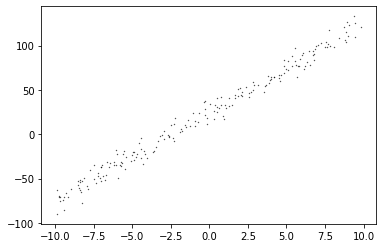

In [6]:
plt.scatter(train_set[:,0],train_set[:,1], c="black", s=0.1)
plt.show()


# Linear regression
모델은 다음과 같다.
$$ h_θ​(x)=θ_0​+θ_1​x $$
cost는 다음과 같다.
$$ J(θ)=\frac{1}{2m}\sum_{i=1}^{m}​(h_θ​(x^{(i)})−y^{(i)})^{2} $$

적당히 [-100,100]에서 무작위로 $$ θ_0​, θ_1$$ 을 고른다.  


함수 h(th0, th1, x)를 정의하여 편의를 위해 사용한다.  
J 함수로 오차를 일단 생각해본다.  
역시 오차가 이상하므로 GD를 시작한다.

$$ θ_0(t+1)​ := θ_0(t)​−α​\frac{1}{m}\sum_{i=1}^{m}​(h_θ​(x^{(i)})−y^{(i)}) $$
$$ θ_1(t+1) := θ_1(t)−α\frac{1}{m}\sum_{i=1}^{m}(h_θ(x^{(i)})−y^{(i)})x^{(i)}$$

이것을 바탕으로 다음 θ를 정해봅니다.



In [0]:
g_th0 = rd.uniform(-100,100)
g_th1 = rd.uniform(-100,100)
alpha = 0.01


def h(th0, th1, x):
    return th0 + th1*x

def J(th0, th1):
    sum = 0
    for i in range(m):
        # train_set[i,0] ith row, x-axis
        sum = sum + ((h(th0, th1, train_set[i,0]) - train_set[i,1]) ** 2)
    return (1/(2*m)) * sum

def th0_cal(th0, th1):
    sum = 0
    for i in range(m):
        sum = sum + (h(th0, th1, train_set[i,0]) - train_set[i,1])
    return (1/m) * sum

def th1_cal(th0, th1):
    sum = 0
    for i in range(m):
        sum = sum + ((h(th0, th1, train_set[i,0]) - train_set[i,1]) * train_set[i,0])
    return (1/m) * sum

J_log = [J(g_th0, g_th1)]
th0_log = [g_th0]
th1_log = [g_th1]

# import sys
e = 5*10 ** (-6)
from tqdm import tqdm, trange

for i in tqdm(range(550000)):
    temp0 = g_th0-alpha*(1/m)* th0_cal(g_th0, g_th1)
    temp1 = g_th1-alpha*(1/m)* th1_cal(g_th0, g_th1)
    g_th0 = temp0
    g_th1 = temp1
    J_log.append(J(g_th0, g_th1))
    th0_log.append(g_th0)
    th1_log.append(g_th1)
    if abs(J(g_th0, g_th1)) < 1 and abs(g_th0 - th0_log[-2]) <= e and abs(g_th1 - th1_log[-2]) <= e and abs(J(g_th0, g_th1) - J_log[-2]) <=e:
        break


print("\ng_th0 : ", g_th0, "g_th1 : ", g_th1, "cost : ", J(g_th0, g_th1))


  0%|          | 38/450000 [00:00<41:18, 181.58it/s]

ERROR! Session/line number was not unique in database. History logging moved to new session 59


100%|██████████| 450000/450000 [40:07<00:00, 186.89it/s]


g_th0 :  7.332542286521389 g_th1 :  2.2986921112472216 cost :  0.5641367592412722


# 코드 구조의 설명
학습율은 0.01로 하면, 초기 검사에서 적합하다는 사실을 얻었습니다.
(발산하지 않는 정도에서 적당히 컸음)

the optimization should be performed until convergence 라는 조건문을 보고
모든 변화율이 특정 값 아래로 떨어지면 정지시키려고 하였습니다.

if abs(J(g_th0, g_th1)) < 1 and abs(g_th0 - th0_log[-2]) <= e and abs(g_th1 - th1_log[-2]) <= e and abs(J(g_th0, g_th1) - J_log[-2]) <=e:를 조건으로 사용하려고 하였습니다만, (기울기가 더 이상 변하지 않는 것)
(단 e는 시스템의 float의 입실론값)

언제 멈출 지 모르기도 하고, 진행사항을 확인하기가 너무 어려워, 
250,000 회 반복해서, 진행사항을 확인했습니다.
아직 bias가 학습되지 않았으므로 
적당히 돌아갈 수 있는 크기인
350,000 회로 설정하여 테스트합니다.

g_th0 :  2.4751128432339686 g_th1 :  0.9963501834570437 cost :  3.5559549191289355

코스트가 3~4 이였습니다.

적당하다고 생각해서 

abs(J(g_th0, g_th1) - J_log[-2]) 등의 값을 조사하여보니
7.304113649730937e-05 등의 값을 얻었습니다.

그래서 e 값을 $$ 5*10^{-6}$$
으로 두고 이때의 변화율에 도달한다면, 프로그램을 정지시키도록 하였습니다.

최종적으로 550,000 번을 돌고, 중간에 e 이하로 학습 변화율이 떨어진다면 정지시키도록 하였습니다.




In [0]:
print(abs(J(g_th0, g_th1)))
print(abs(g_th0 - th0_log[-2]))
print(abs(g_th1 - th1_log[-2]))
print(abs(J(g_th0, g_th1) - J_log[-2]))

0.5641367592412722
3.2695864868870217e-06
1.6249193102169102e-09
1.069014499033294e-06


# Output results [2pt]


1. the set of points that have random perturbations with respect to the straight line (in black color)
2. a straight line that is the graph of a solution obtained by linear regression (in red color)

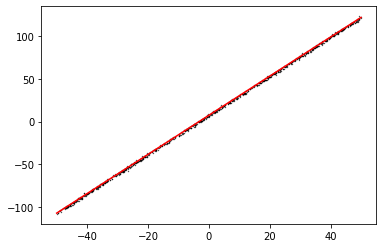

In [0]:
plt.scatter(train_set[:,0],train_set[:,1], c="black", s=0.1)
plt.plot([lower,upper],[g_th1*lower+g_th0,g_th1*upper+g_th0],'r-')
plt.show()

# Plotting the energy values [3pt]


1. the value of the objective function at every optimization step by the gradient descent algorithm (in blue color)
2. the optimization should be performed until convergence

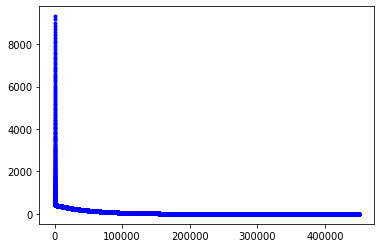

In [0]:
plt.plot(J_log,'b.')
plt.show()

# Plotting the model parameters [3pt]


1. the value of the model parameters $$\theta_0\,and\,\theta_1$$​ at every optimization step (in red θ_0 and blue θ_1​)
2. the optimization should be performed until convergence

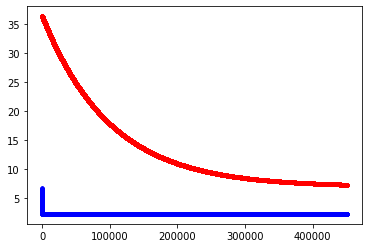

7.332542286521389 2.2986921112472216 0.5641378282557712


In [0]:
plt.plot(th0_log,'r.')
plt.plot(th1_log,'b.')
plt.show()

print(th0_log[-1], th1_log[-1], J_log[-2])